# Lab 02: Data Exploration

Summary:

1. Data Exploration and initial analysis:
    - Loading the data.
    - Inspecting data shape, column names, and data types, variable types.
    - Viewing basic descriptive statistics and unique values.
    - Subsetting data by rows and columns, and conditional selection.

2. Data Quality Checks:
    - Identifying **missing values**.
    - Checking and correcting **data types**.
    - Detecting and handling **duplicate records**.

4. Data Aggregation and Operations:
    - Summing and aggregating data by columns and rows.
    - Discussing the appropriateness of different operations.

5. Visual Exploration:
    - Plotting univariate distributions (histograms and box plots) for numeric variables.
    - Using matplotlib and seaborn for data visualization.

7. Optional Exercise:
    - Applying the same analysis steps to the project dataset.

In [1]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

# Context
The data we will be using through the pratical classes comes from a small relational database whose schema can be seen below:
![alt text](../figures/schema.png "Relation database schema")

# Reading the Data

In [2]:
# path to database
my_path = os.path.join("..", "data", "datamining.db")

# connect to the database
conn = sqlite3.connect(my_path)

# the query
query = """
select
    age, 
    income, 
    frq, 
    rcn, 
    mnt, 
    clothes, 
    kitchen, 
    small_appliances, 
    toys, 
    house_keeping,
    dependents, 
    per_net_purchase,
    g.gender, 
    e.education, 
    m.status, 
    r.description
from customers as c
    join genders as g on g.id = c.gender_id
    join education_levels as e on e.id = c.education_id
    join marital_status as m on m.id = c.marital_status_id
    join recommendations as r on r.id = c.recommendation_id
order by c.id;
"""

df = pd.read_sql_query(query, conn)

# Metadata
- *id* - The unique identifier of the customer
- *age* - The year of birht of the customer
- *income* - The income of the customer
- *frq* - Frequency: number of purchases made by the customer
- *rcn* - Recency: number of days since last customer purchase
- *mnt* - Monetary: amount of € spent by the customer in purchases
- *clothes* - Number of clothes items purchased by the customer
- *kitchen* - Number of kitchen items purchased by the customer
- *small_appliances* - Number of small_appliances items purchased by the customer
- *toys* - Number of toys items purchased by the customer
- *house_keeping* - Number of house_keeping items purchased by the customer
- *dependents* - Binary. Whether or not the customer has dependents
- *per_net_purchase* - Percentage of purchases made online
- *education* - Education level of the customer
- *status* - Marital status of the customer
- *gender* - Gender of the customer
- *description* - Last customer's recommendation description

In [3]:
df.head()

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
0,1946,90782,33,66,1402,37,5,44,10,3,0,19,M,Graduation,Together,Take my money!!
1,1936,113023,32,6,1537,55,1,38,4,2,0,9,F,PhD,Divorced,Take my money!!
2,1990,28344,11,69,44,32,19,24,1,24,1,59,M,Graduation,Married,Kind of OK
3,1955,93571,26,10,888,60,10,19,6,5,1,35,F,Master,,OK nice!
4,1955,91852,31,26,1138,59,5,28,4,4,1,34,F,Graduation,Together,Take my money!!


# Initial Analysis

Pandas user guide: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

Pandas 10 min tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

## What are some characteristics of our data?

We can use the `.shape` method to see how much data we have.

It returns a tuple with (nrows, ncols).

In [4]:
# Check the shape
df.shape

(8998, 16)

In [5]:
# How to get the names of the columns of the data?
df.columns

Index(['age', 'income', 'frq', 'rcn', 'mnt', 'clothes', 'kitchen',
       'small_appliances', 'toys', 'house_keeping', 'dependents',
       'per_net_purchase', 'gender', 'education', 'status', 'description'],
      dtype='object')

We can use the `.info()` method to get some information about the dataset we have.

In [6]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               8998 non-null   int64 
 1   income            8998 non-null   object
 2   frq               8998 non-null   int64 
 3   rcn               8998 non-null   int64 
 4   mnt               8998 non-null   int64 
 5   clothes           8998 non-null   int64 
 6   kitchen           8998 non-null   int64 
 7   small_appliances  8998 non-null   int64 
 8   toys              8998 non-null   int64 
 9   house_keeping     8998 non-null   int64 
 10  dependents        8998 non-null   object
 11  per_net_purchase  8998 non-null   int64 
 12  gender            8998 non-null   object
 13  education         8998 non-null   object
 14  status            8998 non-null   object
 15  description       8998 non-null   object
dtypes: int64(10), object(6)
memory usage: 1.1+ MB


What do these mean?

- Non-Null Count
- Dtype
    - object
    - float64
    - bool


Let's look at datatypes more closely.

Do their values look correct?

*Hint* compare the dtypes with the provided metadata.

In [7]:
# Check data types
df.dtypes

age                  int64
income              object
frq                  int64
rcn                  int64
mnt                  int64
clothes              int64
kitchen              int64
small_appliances     int64
toys                 int64
house_keeping        int64
dependents          object
per_net_purchase     int64
gender              object
education           object
status              object
description         object
dtype: object

We can use the `.describe()` method to calculate the basic descriptive statistics of our data.

In [12]:
df.describe().round(1)


,age,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase
count,8998.0,8998.0,8998.0,8998.0,8998.0,8998.0,8998.0,8998.0,8998.0,8998.0
mean,1966.1,19.8,62.5,622.2,50.4,7.0,28.5,7.0,6.9,42.4
std,17.3,10.9,69.8,646.8,23.4,7.8,12.6,7.9,7.9,18.5
min,1936.0,3.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,4.0
25%,1951.0,10.0,26.0,63.0,33.0,2.0,19.0,2.0,2.0,28.0
50%,1966.0,17.0,53.0,383.0,51.0,4.0,28.0,4.0,4.0,45.0
75%,1981.0,28.0,79.0,1076.0,69.0,10.0,37.0,10.0,9.0,57.0
max,1996.0,59.0,549.0,3052.0,99.0,75.0,74.0,62.0,77.0,88.0


By default `.describe()` only considers numeric features.

In [13]:
df.describe(include="all").round(2)



,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
count,8998.00,8998,8998.00,8998.00,8998.00,8998.00,8998.00,8998.00,8998.00,8998.00,8998.0,8998.00,8998,8998,8998,8998
unique,NaN,8525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2,7,7,5
top,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,M,Graduation,Married,OK nice!
freq,NaN,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6164.0,NaN,5784,4429,3273,3434
mean,1966.06,NaN,19.85,62.47,622.16,50.45,7.04,28.52,7.04,6.93,NaN,42.43,NaN,NaN,NaN,NaN
std,17.30,NaN,10.90,69.76,646.77,23.42,7.85,12.59,7.92,7.88,NaN,18.50,NaN,NaN,NaN,NaN
min,1936.00,NaN,3.00,0.00,6.00,1.00,0.00,1.00,0.00,0.00,NaN,4.00,NaN,NaN,NaN,NaN
25%,1951.00,NaN,10.00,26.00,63.00,33.00,2.00,19.00,2.00,2.00,NaN,28.00,NaN,NaN,NaN,NaN
50%,1966.00,NaN,17.00,53.00,383.00,51.00,4.00,28.00,4.00,4.00,NaN,45.00,NaN,NaN,NaN,NaN
75%,1981.00,NaN,28.00,79.00,1076.00,69.00,10.00,37.00,10.00,9.00,NaN,57.00,NaN,NaN,NaN,NaN


In [14]:
# Use .describe() to check all data types (numeric, object, boolean, etc.)
df.describe(include="all").T



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,8998.0,NaN,NaN,NaN,1966.05968,17.296552,1936.0,1951.0,1966.0,1981.0,1996.0
income,8998,8525,,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frq,8998.0,NaN,NaN,NaN,19.848077,10.903435,3.0,10.0,17.0,28.0,59.0
rcn,8998.0,NaN,NaN,NaN,62.469771,69.761802,0.0,26.0,53.0,79.0,549.0
mnt,8998.0,NaN,NaN,NaN,622.162814,646.768205,6.0,63.0,383.0,1076.0,3052.0
clothes,8998.0,NaN,NaN,NaN,50.446655,23.422249,1.0,33.0,51.0,69.0,99.0
kitchen,8998.0,NaN,NaN,NaN,7.039675,7.848139,0.0,2.0,4.0,10.0,75.0
small_appliances,8998.0,NaN,NaN,NaN,28.524116,12.586437,1.0,19.0,28.0,37.0,74.0
toys,8998.0,NaN,NaN,NaN,7.036897,7.924422,0.0,2.0,4.0,10.0,62.0
house_keeping,8998.0,NaN,NaN,NaN,6.929984,7.882655,0.0,2.0,4.0,9.0,77.0


example for unique values in a column
['Graduation' 'PhD' 'Master' '1st Cycle' '2nd Cycle' 'OldSchool' '']
select one column
    age  income
0  1946   90782
1  1936  113023
2  1990   28344
3  1955   93571
4  1955   91852
number of duplicate rows
0


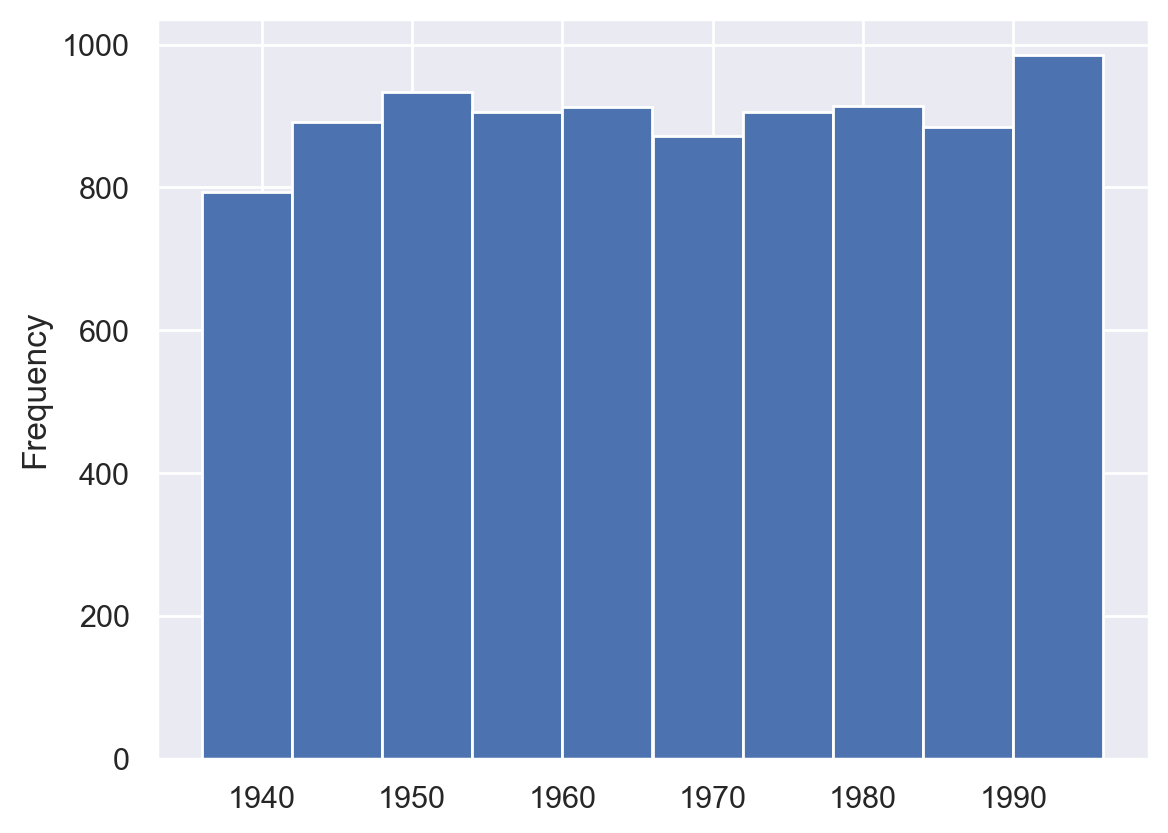

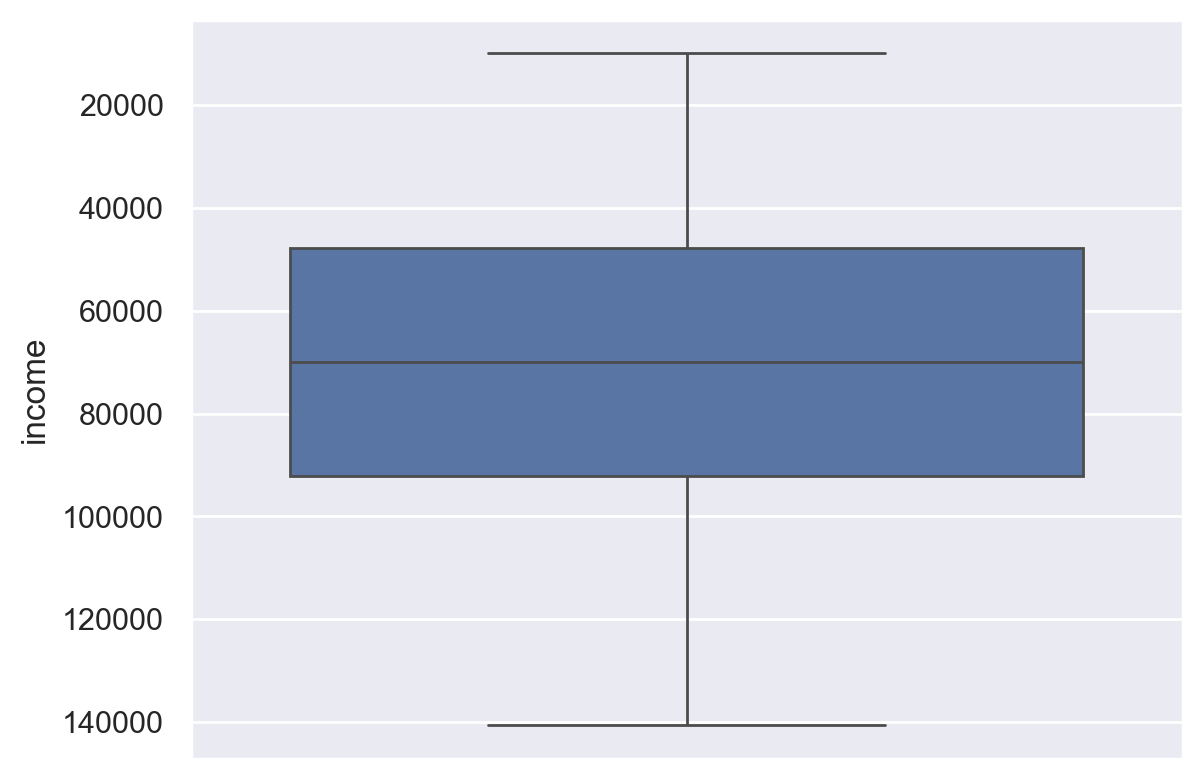

In [38]:
# Further explore the dataset
print('example for unique values in a column')   # Example for unique values in a column
print(df['education'].unique())

print('select one column')   # Example for one column
print(df[['age', 'income']].head())  

print('number of duplicate rows')          # Conditional selection               
print(df.duplicated().sum())  

df['age'].plot(kind='hist') 
plt.show()
sns.boxplot(y=df['income'])                 # Boxplot for income
plt.show()


In [46]:
print('select rows by index')         # Select columns
print(df.iloc[0:4, [0,5]])
print("\n")
print('conditional selection')   # Select rows by index
print(df.loc[df['age'] > (2025-40), 'age'])


select rows by index
    age  clothes
0  1946       37
1  1936       55
2  1990       32
3  1955       60


conditional selection
2       1990
9       1994
15      1992
17      1990
18      1988
        ... 
8973    1993
8985    1992
8990    1995
8995    1986
8997    1994
Name: age, Length: 1578, dtype: int64


## Let's do some operations on our data

### Taking a subset of data

You can take a subset with fewer columns by giving a **list** of features:

In [49]:
## Notice that we use two sets of square brackets

df[['age', 'education']]

,age,education
0,1946,Graduation
1,1936,PhD
2,1990,Graduation
3,1955,Master
4,1955,Graduation
...,...,...
8993,1960,1st Cycle
8994,1975,2nd Cycle
8995,1986,Graduation
8996,1938,2nd Cycle


You can select a single column of data by providing the name of a single column. This returns a "Series", instead of a DataFrame.

# How to get the values of one column of data?
# Different ways to access the values of a column

In [15]:

df['age']

0       1946
1       1936
2       1990
3       1955
4       1955
        ... 
8993    1960
8994    1975
8995    1986
8996    1938
8997    1994
Name: age, Length: 8998, dtype: int64

In [16]:
## Notice the difference

df[['age']]

,age
0,1946
1,1936
2,1990
3,1955
4,1955
...,...
8993,1960
8994,1975
8995,1986
8996,1938


In [20]:
## .loc also works for column subsets

df.loc[[0,1,2,3,4], ['age', 'education']]

,age,education
0,1946,Graduation
1,1936,PhD
2,1990,Graduation
3,1955,Master
4,1955,Graduation


#### What about a subset based on a condition?

I want the customers with Age < 40

In [23]:
## Let's break this down

age = 40
birthyear = (2025-age)
birthyear

1985

In [24]:
## Let's break this down
df.loc[df['age'] > birthyear, ['age', 'education']]


,age,education
2,1990,Graduation
9,1994,1st Cycle
15,1992,Graduation
17,1990,Graduation
18,1988,2nd Cycle
...,...,...
8973,1993,2nd Cycle
8985,1992,Graduation
8990,1995,1st Cycle
8995,1986,Graduation


### Aggregating data

We can perform mathematical operations on our data

In [27]:
df['age'].sum().round()

np.int64(17690605)

In [29]:
## Think of other operations to try: 
## Add two columns together: frq and mnt

## Does this make sense?


You can also do this by row

In [30]:
## Sum by column

df.sum(numeric_only=True)

age                 17690605
frq                   178593
rcn                   562103
mnt                  5598221
clothes               453919
kitchen                63343
small_appliances      256660
toys                   63318
house_keeping          62356
per_net_purchase      381776
dtype: int64

In [31]:
## Sum by row
## Notice the difference

df.sum(numeric_only=True, axis=1)

0       3565
1       3620
2       2273
3       3014
4       3284
        ... 
8993    3041
8994    2225
8995    3229
8996    3863
8997    2225
Length: 8998, dtype: int64

Discussion:

Does it make sense to add all the numeric features in one row?

## Take a closer look and point out possible problems


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8998.0,1966.059680,17.296552,1936.0,1951.0,1966.0,1981.0,1996.0
frq,8998.0,19.848077,10.903435,3.0,10.0,17.0,28.0,59.0
rcn,8998.0,62.469771,69.761802,0.0,26.0,53.0,79.0,549.0
mnt,8998.0,622.162814,646.768205,6.0,63.0,383.0,1076.0,3052.0
clothes,8998.0,50.446655,23.422249,1.0,33.0,51.0,69.0,99.0
kitchen,8998.0,7.039675,7.848139,0.0,2.0,4.0,10.0,75.0
small_appliances,8998.0,28.524116,12.586437,1.0,19.0,28.0,37.0,74.0
toys,8998.0,7.036897,7.924422,0.0,2.0,4.0,10.0,62.0
house_keeping,8998.0,6.929984,7.882655,0.0,2.0,4.0,9.0,77.0
per_net_purchase,8998.0,42.428984,18.495742,4.0,28.0,45.0,57.0,88.0


In [51]:
df.describe(include='object').T

,count,unique,top,freq
income,8998,8525,,46
dependents,8998,3,1,6164
gender,8998,2,M,5784
education,8998,7,Graduation,4429
status,8998,7,Married,3273
description,8998,5,OK nice!,3434


### Missing Values

(hint: a missing values in pandas is represented with a NaN value)

We can use the `.isna()` method to see if we have missing values.

In [59]:
## .isna() returns True if the value in that cell is missing, and False otherwise.

df.isna().head()

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [61]:
## .isna() returns True if the value in that cell is missing, and False otherwise.

df.isna().sum()

## What does this mean?
## Is this helpful?

age                 0
income              0
frq                 0
rcn                 0
mnt                 0
clothes             0
kitchen             0
small_appliances    0
toys                0
house_keeping       0
dependents          0
per_net_purchase    0
gender              0
education           0
status              0
description         0
dtype: int64

In [38]:
# replace "" by nans
df.replace("", np.nan, inplace=True)

# count of missing values
df.isna().sum()

/var/folders/pc/rc1k1_j13zx7l6dfd32b0lph0000gn/T/ipykernel_2669/3385904135.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("", np.nan, inplace=True)


age                   0
income               46
frq                   0
rcn                   0
mnt                   0
clothes               0
kitchen               0
small_appliances      0
toys                  0
house_keeping         0
dependents          282
per_net_purchase      0
gender                0
education            47
status              177
description           0
dtype: int64

### Data Types

In [40]:
# fix wrong dtypes
df.dependents = df.dependents.astype("boolean")  # converting to "boolean" over "bool" allows preservation of NaNs

In [41]:
# check descriptive statistics again
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,8998.0,NaN,NaN,NaN,1966.05968,17.296552,1936.0,1951.0,1966.0,1981.0,1996.0
income,8952.0,NaN,NaN,NaN,69963.550827,27591.556226,10000.0,47741.0,70030.5,92218.0,140628.0
frq,8998.0,NaN,NaN,NaN,19.848077,10.903435,3.0,10.0,17.0,28.0,59.0
rcn,8998.0,NaN,NaN,NaN,62.469771,69.761802,0.0,26.0,53.0,79.0,549.0
mnt,8998.0,NaN,NaN,NaN,622.162814,646.768205,6.0,63.0,383.0,1076.0,3052.0
clothes,8998.0,NaN,NaN,NaN,50.446655,23.422249,1.0,33.0,51.0,69.0,99.0
kitchen,8998.0,NaN,NaN,NaN,7.039675,7.848139,0.0,2.0,4.0,10.0,75.0
small_appliances,8998.0,NaN,NaN,NaN,28.524116,12.586437,1.0,19.0,28.0,37.0,74.0
toys,8998.0,NaN,NaN,NaN,7.036897,7.924422,0.0,2.0,4.0,10.0,62.0
house_keeping,8998.0,NaN,NaN,NaN,6.929984,7.882655,0.0,2.0,4.0,9.0,77.0


### Duplicates

In [42]:
# duplicated observations
df.duplicated().sum()

np.int64(0)

*What would it look like if we had duplicates?*

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html


In [63]:
df_dupes = pd.DataFrame({
     'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
     'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
     'rating': [4, 4, 3.5, 15, 5]
})

df_dupes

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [65]:
df_dupes.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [44]:
# duplicated observations
df_dupes.duplicated().sum()

np.int64(1)

In [45]:
df_dupes.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


## Take a closer look and point out possible problems:

- Duplicates?
- Data types?
- Missing values?
- Strange values?
- Descriptive statistics?



# Visual Exploration

Matplotlib tutorials: https://matplotlib.org/stable/tutorials/index.html

Matplotlib gallery: https://matplotlib.org/stable/gallery/index.html

Seaborn tutorials: https://seaborn.pydata.org/tutorial.html


Seaborn gallery: https://seaborn.pydata.org/examples/index.html

### Matplotlib vs Seaborn:

**Matplotlib** - lower level. allows to fully customize the plot appearance

**Seaborn** - higher level. Complex off-the-shelf plots with one line. Matplotlib on steroids


In [46]:
# Define metric and non-metric features. Why?
non_metric_features = ["education", "status", "gender", "dependents", "description"]
metric_features = df.columns.drop(non_metric_features).to_list()

## Pyplot-style vs Object-Oriented-style
- Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.

More details: https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/

## Numeric Variables' Univariate Distribution

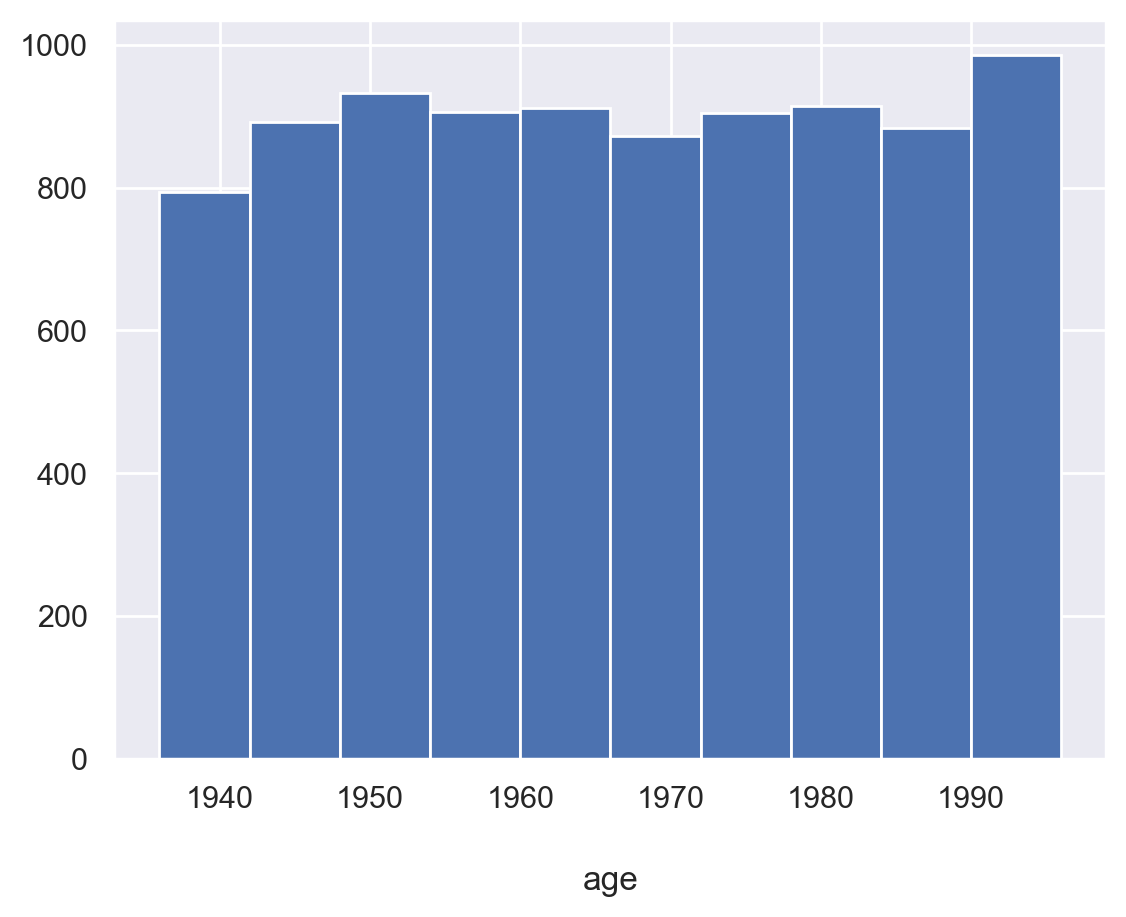

In [47]:
# Single Metric Variable Histogram
plt.hist(df["age"], bins=10)  # mess around with the bins
plt.title("age", y=-0.2)

plt.show()

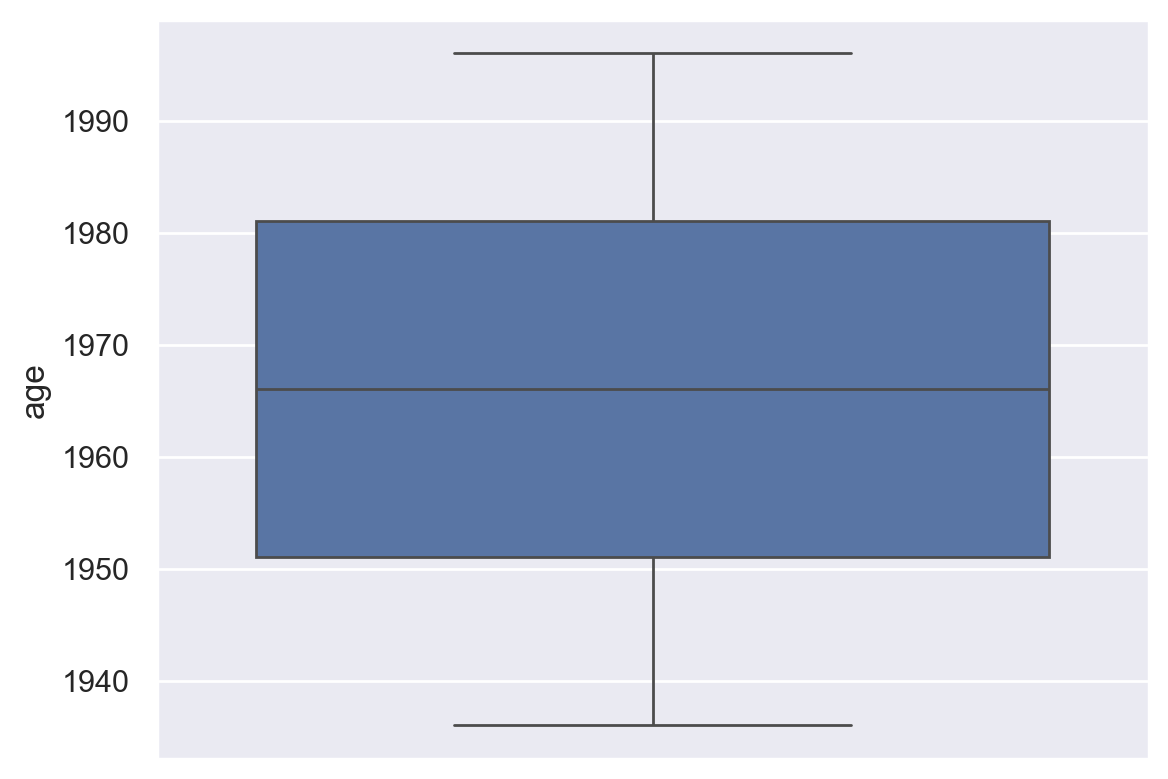

In [48]:
# Single Metric Variable Box Plot
sns.boxplot(y=df["age"])

plt.show()

What information can we extract from the plot above?

In [49]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    # CODE HERE (extra: set each axis title as the feature name)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

IndentationError: expected an indented block after 'for' statement on line 9 (558614610.py, line 14)

In [ ]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 13))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    # CODE HERE
    
# Layout
# Add a centered title to the figure:
title = 'Numeric Variables\' Box Plots' # notice the "\"

# CODE HERE
plt.show()

### Insights:
- univariate distributions
- potential univariate outliers

--------------------------------------

### During our Exploratory Data Analysis (EDA), we must also account for:
- Coherence check
- Outliers
- Feature Engineering

### Depending on the context, various steps must be considered when performing Data Preprocessing. 

The most relevant steps are the following:
- Coherence check (find inconsistent values, missing values, outliers and any other problem you may find in your dataset)
- Data editing (fix inconsistent values)
- Data cleansing (drop observations - Outlier removal and removal of inconsistent values and/or features)
- Data wrangling (feature extraction/engineering and transformation)
- Data reduction (reducing the dimensionality of a dataset, producing summary statistics, reducing the number of records in a dataset)

## Optional Exercise

Download the [Amazing Internation Airlines Inc dataset](https://elearning.novaims.unl.pt/mod/folder/view.php?id=96622). Using the  `DM_AIAI_FlightsDB.csv
` and the `DM_AIAI_CustomerDB.csv`  file, perform the same exercises that we did in this notebook.

Identify the metric and non-metric features in this dataset.

Identify if any problems exist:

- Duplicates?
- Data types?
- Missing values?
- Strange values?
- Descriptive statistics?


In [ ]:
# please use pd.read_csv()
# try to note from if the separator is , or ; or \t